**Notes and Reference**

This is my personal android dev learning notebook.

The majority of the code from a handler video tutorial by Coding in flow. Link to the original tutorial is provided below. Have fun learning :) !

- Coding in Flow (2018) How to Start a Background Thread in Android https://www.youtube.com/watch?v=QfQE1ayCzf8&ab_channel=CodinginFlow

# 1 UI

## `Switch`

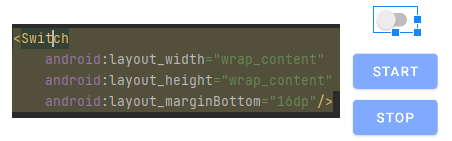

In [6]:
path = "/content/here/MyDrive/Android/BackgroundThread/switch.png"
show_img(path)

# 2 `Java`

## `BackgroundThread`
- We have to put all the work in the `main Thread` into the `background Thread` to make sure the app doesn't (look like) freeze.


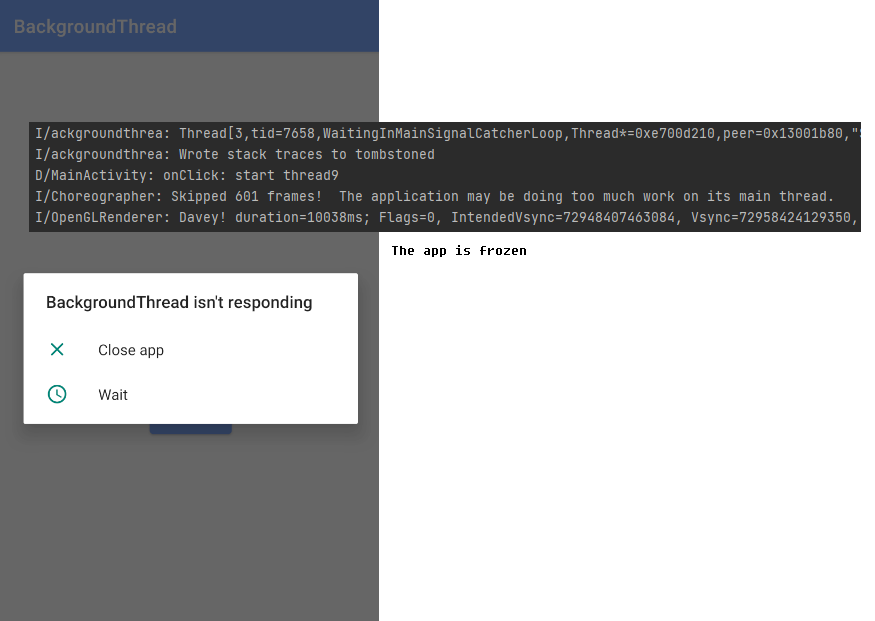

In [2]:
path = "/content/here/MyDrive/Android/BackgroundThread/main thread frozen.png"
show_img(path)

### 2 ways to start a `BackgroundThread`
1. `extends Thread` + write `run()`
2. `implements Runnable` + pass the `Runnable` object to a new `Thread`


With both solutions, in fact, `Thread()` executes `Runnable` because `Thread` class implements `Runnable` interface.

#### `extend Thread` + `run()`

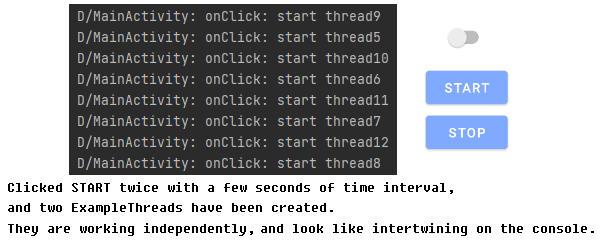

In [3]:
path = "/content/here/MyDrive/Android/BackgroundThread/multiple threads in action.png"
show_img(path)

In [ ]:
    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        startBtn = findViewById(R.id.idBTNstart_thread);
        startBtn.setOnClickListener(new View.OnClickListener(){

            @Override
            public void onClick(View view) {
                ExampleThread thread = new ExampleThread(20);   # Each time START is clicked, a new thread is created.
                thread.start();
            }
        });

In [ ]:
# extend the Thread class. 
    ...

    class ExampleThread extends Thread {
        int seconds;

        ExampleThread(int seconds){
            this.seconds = seconds;
        }

        @Override
        public void run(){
            for (int i = 0; i < seconds; i++) {
                Log.d(TAG, "onClick: start thread" + i);
                try {
                    Thread.sleep(1000);
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
        }
    }


#### `implements Runnable` + `Thread(Runnable)`

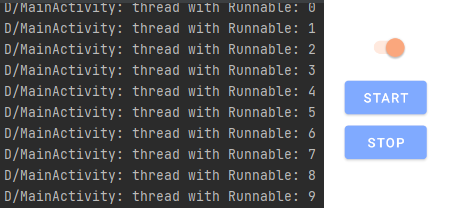

In [4]:
path = "/content/here/MyDrive/Android/BackgroundThread/background thread in action.png"
show_img(path)

In [ ]:
# This is the preferred way to extending Thread, 
# because it does not change the behaviour of Thread.
    ...

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        startBtn = findViewById(R.id.idBTNstart_thread);
        startBtn.setOnClickListener(new View.OnClickListener(){

            @Override
            public void onClick(View view) {
                ExampleRunnable runnable = new ExampleRunnable(10);
                runnable.run();  # we can still make the main thread work this way.
                                 # or run the work on the current thread.
                new Thread(runnable).start();    # start the Runnable(job) on a new Thread.

            }
        });
    
    ...

In [ ]:
    ...
    
    class ExampleRunnable implements Runnable {
        int seconds;
    
        ExampleRunnable(int seconds){
            this.seconds = seconds;
        }

        @Override
        public void run(){
            for (int i = 0; i < seconds; i++) {
                Log.d(TAG, "thread with Runnable: " + i);
                try {
                    Thread.sleep(1000);
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
        }
    }

- `Thread` and `Runnable` are core `java` classes; not limited to Android. 
- However in Android..:
  - `Thread` has `Handler` + `Looper` classes. 
  - These components build the basis for higher `abstraction classes` including `AsyncTask`, `HandlerThread` & `ThreadPoolExecuter`

The `Runnable` interface encapsulates the code we want executed by a `Thread`.

## `runOnUiThread` 
- `Activity` method.

In [ ]:
                ...
                
                int finalI = i;
                runOnUiThread(new Runnable() {  # static Activity method. can be called directly. 
                    @Override
                    public void run() {
                        startBtn.setText(finalI *10 + "%");
                    }
                });

                ...

## Annonymous `inner class`

In [ ]:
                # Approach 4.
                # Instead of creating a separate class that implements Runnable,
                # we can also use an annonymous inner class.
                new Thread(new Runnable() {
                    @Override
                    public void run() {
                        # work
                    }
                }).start();


## `volatile`
- can fetch the most up-to-date value stored in the variable instead of possibly outdated cached value. 

In [ ]:
private volatile boolean stopThread = false;

# Error Notes

## Changing UI outside the main `Thread`

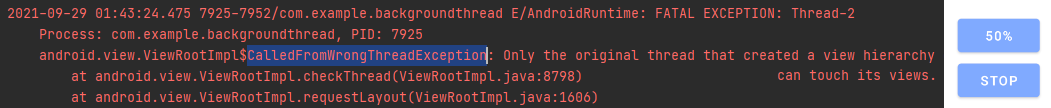

In [5]:
path = "/content/here/MyDrive/Android/BackgroundThread/main thread and changing ui.png"
show_img(path)

In [ ]:
# Trying to change the UI components outside the main Thread.

    ...

    class ExampleRunnable implements Runnable {
        int seconds;

        ExampleRunnable(int seconds){
            this.seconds = seconds;
        }

        @Override
        public void run(){
            for (int i = 0; i < seconds; i++) {
                if (i==5){
                    startBtn.setText("50%");    # Here tries to update the TextView.
                }                               # and this is a Runnable class, which is passed into any newly created Threads.
                Log.d(TAG, "thread with Runnable: " + i);
                try {
                    Thread.sleep(1000);
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
        }
    }

### Solution: `Handler`
- `Handler` makes it easier to toss around works to be done between different `Threads`.

In [ ]:
    ...
    
    class ExampleRunnable implements Runnable {
        int seconds;

        ExampleRunnable(int seconds){
            this.seconds = seconds;
        }

        @Override
        public void run(){
            for (int i = 0; i < seconds; i++) {
                // startBtn.setText("50%");
                int finalI = i;
                mainHandler.post(new Runnable() {      # Create a Handler to post Runnables.
                @Override
                public void run() {
                    startBtn.setText(finalI * 10 + "%");
                    }
                });
                Log.d(TAG, "thread with Runnable: " + i);
                try {
                    Thread.sleep(1000);
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
            mainHandler.post(new Runnable() {
                @Override
                public void run() {
                    startBtn.setText("START");
                }
            });
        }
    }

## `Handler` with no `Looper`
- `Handler` needs a `Looper` and a `MessageQueue` to work with. 
- In below code, no `Looper` and `MessageQueue` were created that are tied to the `BackgroundThread`.

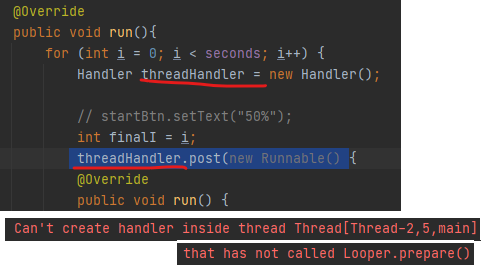

In [7]:
path = "/content/here/MyDrive/Android/BackgroundThread/thread with no looper.png"
show_img(path)

In [ ]:
                # compare
                Handler threadHandler = new Handler();  # this handler is tied to the background Thread. Let's associate it with the main (UI) thread.
                # solution                              # we can achieve it by passing the UI Looper to the constructor.
                Handler threadHandler = new Handler(Looper.getMainLooper()); # now associated with the main (UI) Looper.